In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/images-coud/thumbs-up.png
/kaggle/input/images-coud/skull-icon.png


In [2]:
#loading the data
fake=pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("../input/fake-and-real-news-dataset/True.csv")

In [3]:
#Creating a category for whether fake or not
#where 1 stand for fake news and 0 stands for true news

fake["category"]=1
true["category"]=0

In [4]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)

In [5]:
# df

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


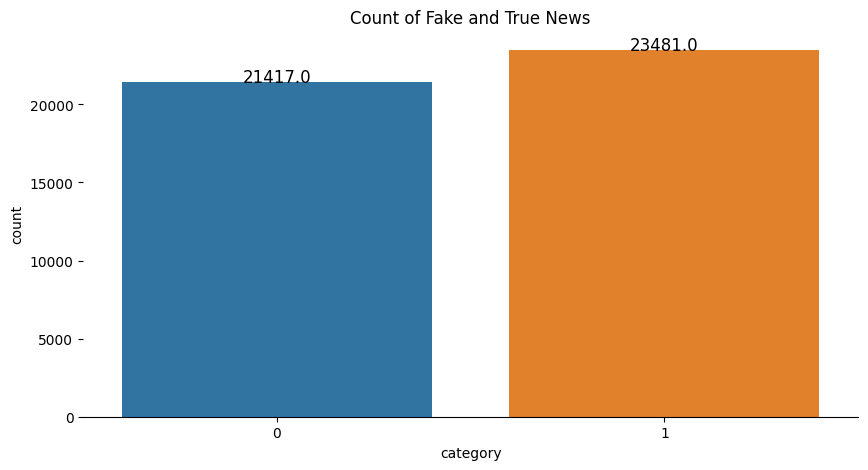

In [8]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

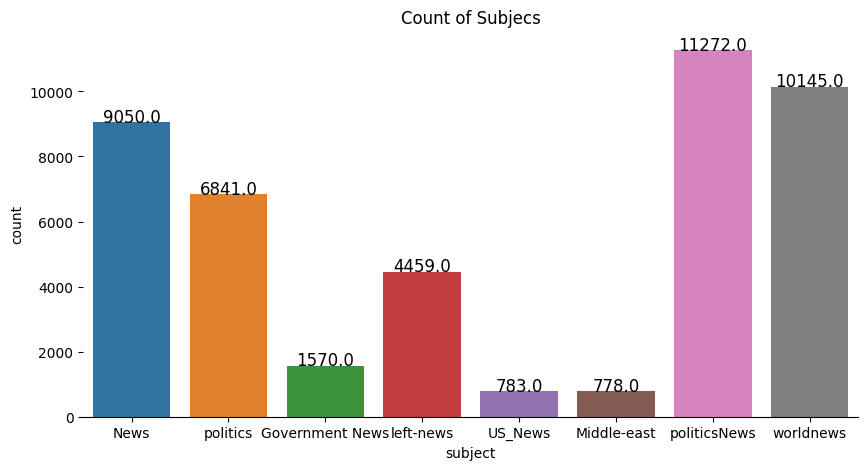

In [9]:
#creating a count plot for subject column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts  
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [10]:
# df= df[["text",'category']]

In [11]:
# df.head()

# Data Cleaning

In [12]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

title       0.0
text        0.0
subject     0.0
date        0.0
category    0.0
dtype: float64

In [13]:
#checking if there is empty string in TEXT column
blanks=[]

#index,label and review of the doc
for index, text in df["text"].items():
    if isinstance(text, str) and text.isspace():
        blanks.append(index)

len(blanks)

631

In [14]:
blanks

[10923,
 11041,
 11190,
 11225,
 11236,
 11241,
 11247,
 11249,
 11267,
 11268,
 11283,
 11284,
 11285,
 11289,
 11290,
 11292,
 11295,
 11296,
 11301,
 11303,
 11304,
 11305,
 11309,
 11314,
 11317,
 11319,
 11322,
 11330,
 11334,
 11335,
 11340,
 11343,
 11348,
 11351,
 11352,
 11357,
 11371,
 11373,
 11374,
 11382,
 11397,
 11402,
 11403,
 11409,
 11410,
 11412,
 11415,
 11419,
 11421,
 11427,
 11431,
 11432,
 11440,
 11448,
 11450,
 11453,
 11462,
 11464,
 11465,
 11472,
 11473,
 11475,
 11478,
 11489,
 11491,
 11493,
 11494,
 11501,
 11505,
 11507,
 11520,
 11531,
 11532,
 11533,
 11538,
 11542,
 11547,
 11549,
 11551,
 11559,
 11563,
 11581,
 11585,
 11589,
 11590,
 11614,
 11624,
 11625,
 11627,
 11631,
 11636,
 11637,
 11643,
 11650,
 11658,
 11661,
 11672,
 11679,
 11681,
 11684,
 11686,
 11688,
 11692,
 11708,
 11718,
 11729,
 11739,
 11753,
 11765,
 11768,
 11777,
 11782,
 11786,
 11788,
 11792,
 11793,
 11803,
 11806,
 11813,
 11821,
 11831,
 11832,
 11841,
 11844,
 11848,


In [15]:
df["text"][16255]

' '

In [16]:
df.shape

(44898, 5)

In [17]:
# df.drop(blanks,inplace = True)

In [18]:
# df.shape

In [19]:
#instead of dropping these values we are going to merge title with text

df["text"] =df["title"]+df["text"]

#we only need two columns rest can be ignored

df=df[["text","category"]]

In [20]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re


In [21]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [22]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [23]:
import string
import re

def clean_text(text):
    """
    Clean the text by applying several methods
    """
    string = ""
    
    # Lowercasing
    text = text.lower()
    
    # Simplifying text
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    
    # Removing any special characters
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    # Splitting into words
    words = text.split()
    
    # Joining the words back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text


In [24]:
# import nltk
# nltk.data.path.append('/kaggle/working/wordnet')  # Path to the uploaded wordnet directory

# # Now you can download the WordNet corpus
# nltk.download('wordnet')

In [25]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [26]:
from wordcloud import WordCloud

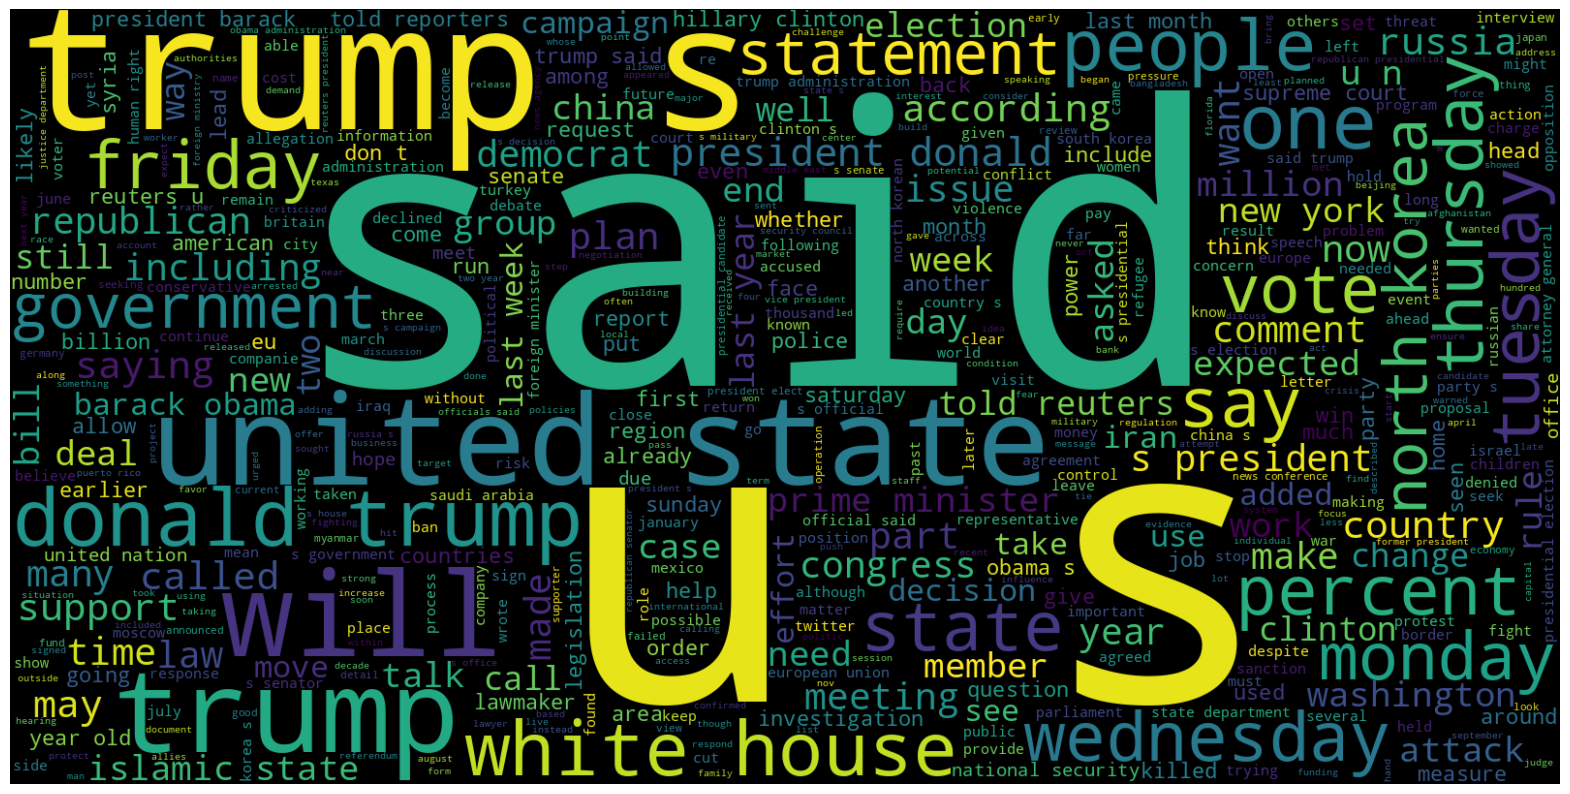

In [27]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [28]:
#creating more intiuive wordcloud 

#pil is pillow and used for image manupulation
from PIL import Image


In [29]:
#creating a mask of thumb
thumb="../input/images-coud/thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

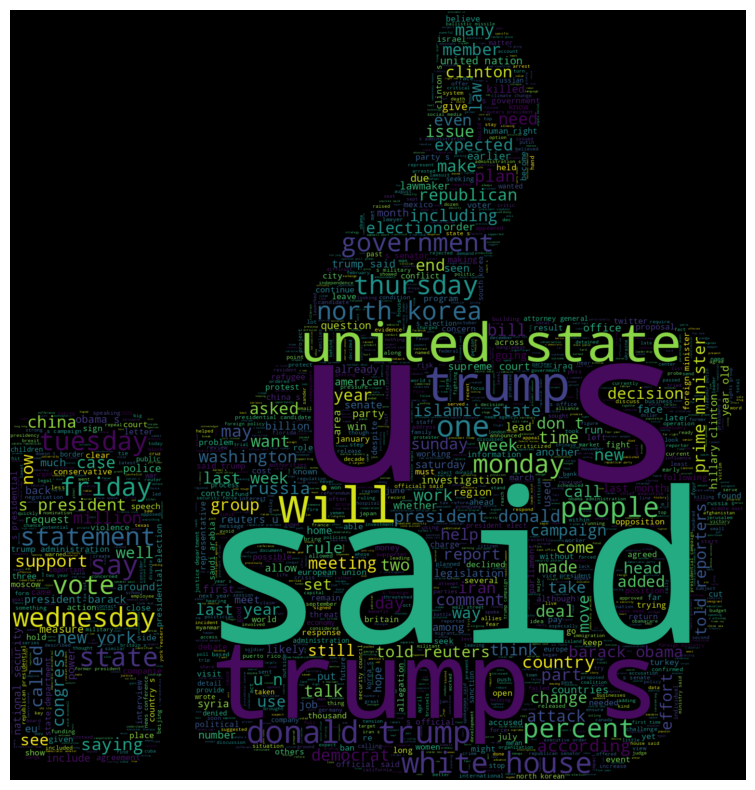

In [30]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [31]:
#creating word cloud using skull image for fake news which depict that 
#fake news are dangerous 

skull="../input/images-coud/skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

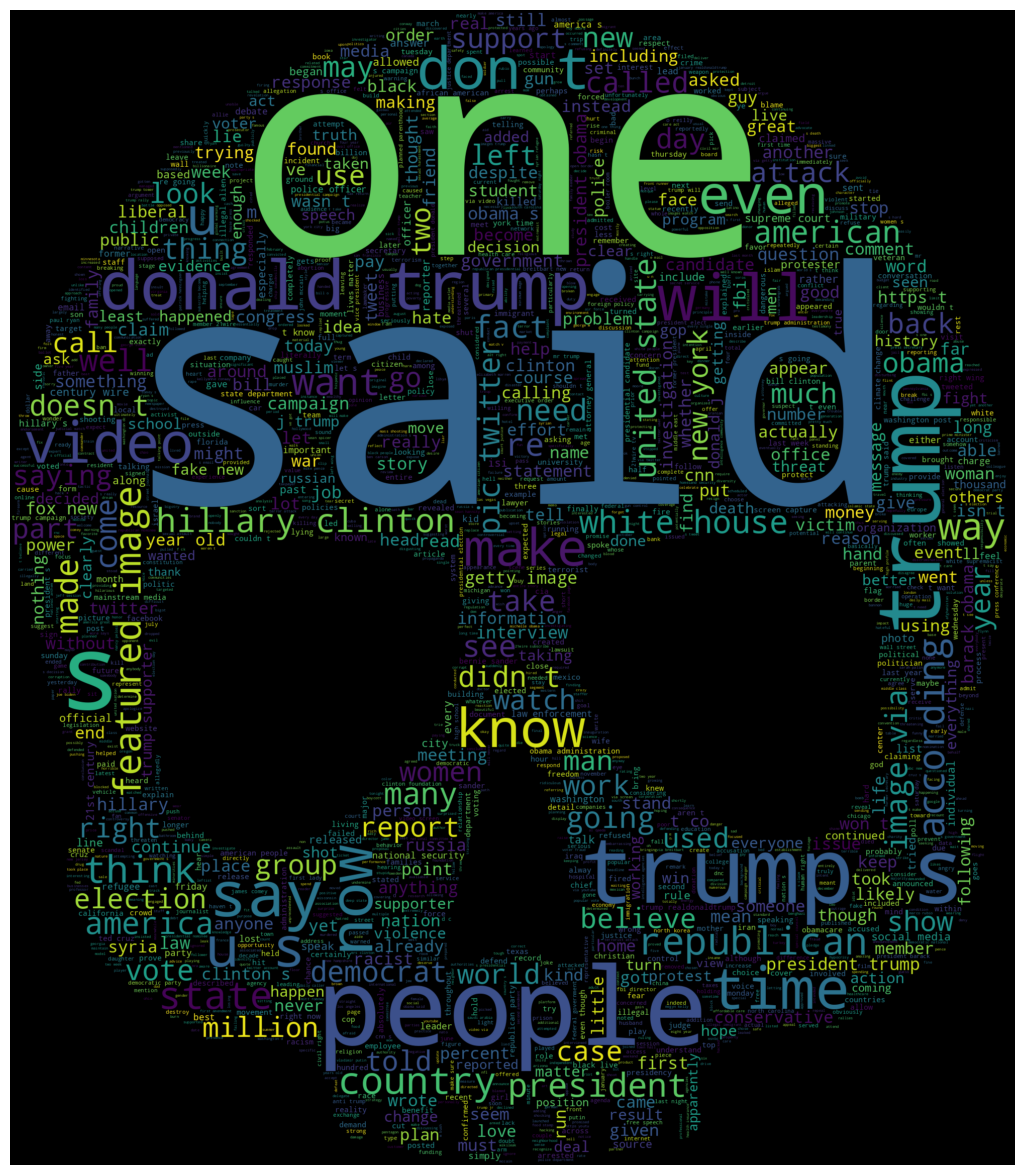

In [32]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [33]:
#splitting the 
from sklearn.model_selection import train_test_split


X=df["text"] #feature 
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [35]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [36]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7039
           1       1.00      0.99      1.00      7778

    accuracy                           1.00     14817
   macro avg       0.99      1.00      0.99     14817
weighted avg       1.00      1.00      1.00     14817



In [39]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.9950057366538435


In [40]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))


[[7006   33]
 [  41 7737]]


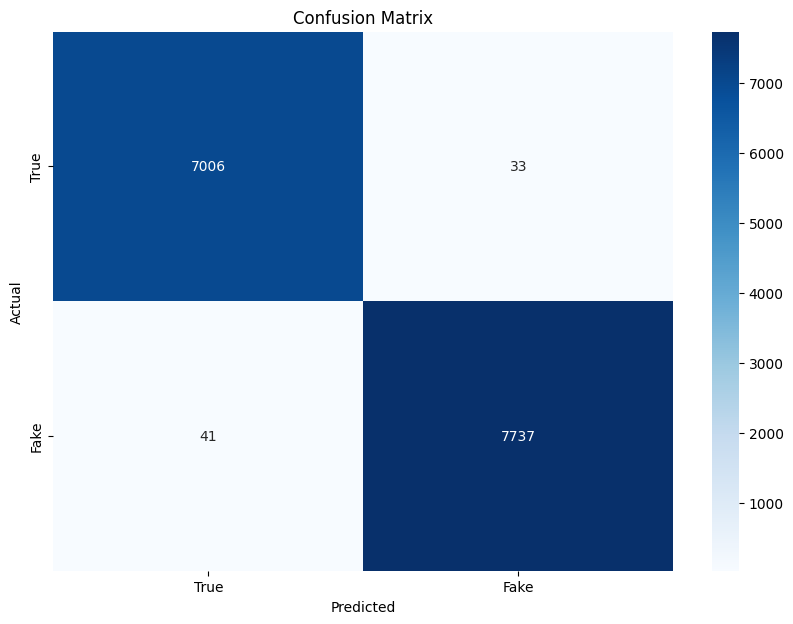

In [41]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(metrics.confusion_matrix(y_test,predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Define the preprocessing function
def clean_text(text):
    """
    Clean the text by applying several methods
    """
    string = ""
    
    # Lowercasing
    text = text.lower()
    
    # Simplifying text
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    
    # Removing any special characters
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    # Splitting into words
    words = text.split()
    
    # Joining the words back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Load the trained model
text_clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC())
])

# Function to classify news article
def classify_news_article(news_article_text):
    # Preprocess the text
    cleaned_news_article_text = clean_text(news_article_text)
    
    # Make prediction
    prediction = text_clf.predict([cleaned_news_article_text])
    
    # Interpret the prediction
    if prediction[0] == 0:
        return "TRUE"
    else:
        return "FAKE"



In [43]:

# Fit the TF-IDF vectorizer on the training data
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [45]:
# Example usage
news_article_text = input("Enter the news article text: ")
classification_result = classify_news_article(news_article_text)
print("The news article is classified as:", classification_result)

Enter the news article text:  Faisal Vawda meets MQM-P leadership to discuss political situation Senator calls for political unity, urging parties to set aside differences to focus on national interests  News Desk December 08, 2024  facebook  twitter  whatsup  linkded  email faisal vawda meets mqm p leadership to discuss political situation Faisal Vawda meets MQM-P leadership to discuss political situation Senator Faisal Vawda has emphasised the need for major political parties and leaders to formulate a national agenda in the interest of the country, to steer Pakistan out of its current crises and move towards political and economic stability. He argued that ongoing protests, sit-ins, and political unrest have been damaging to the country, Express News reported.  Vawda made the statement during his visit to the headquarters of the Muttahida Qaumi Movement-Pakistan (MQM-P) in Karachi on Sunday where he met with the party's coordination committee, members of the provincial assembly, and

The news article is classified as: TRUE
